<a href="https://colab.research.google.com/github/Kenechukwu06/CV/blob/main/House_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost lightgbm statsmodels numpy pandas matplotlib seaborn scikit-learn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/AmesHousing_engineered (1).csv")
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
copied_data = data.copy()

In [5]:
copied_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
sns.set_style("whitegrid")
%matplotlib inline
copied_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
missing = copied_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Cond,159
Garage Yr Blt,159


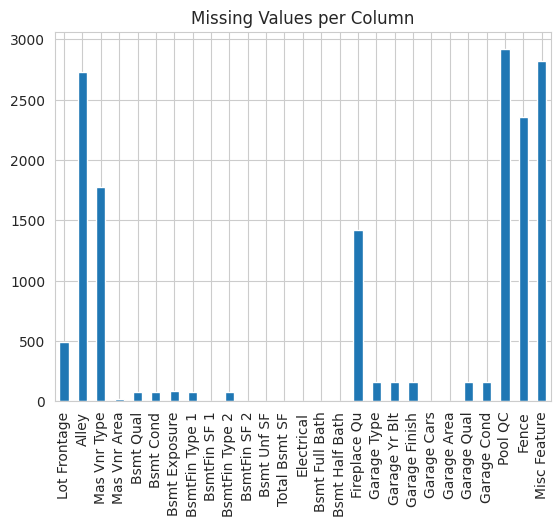

In [8]:
missing[missing > 0].plot(kind = "bar")
plt.title("Missing Values per Column")
plt.show()

In [9]:
copied_data['SalePrice'].describe()

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


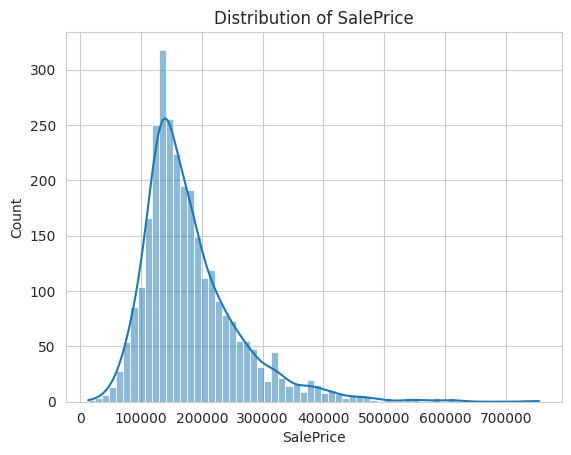

skewness: 1.74


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [10]:
sns.histplot(copied_data['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()
print(f"skewness: {copied_data['SalePrice'].skew():.2f}")
print

In [11]:
num_cols = copied_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = copied_data[num_cols].corr()
corr_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [12]:
correlation_with_saleprice = copied_data[num_cols].corrwith(copied_data['SalePrice'])
display(correlation_with_saleprice.sort_values(ascending=False))

,0
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


Text(0.5, 1.0, 'Gr Liv Area vs SalePrice')

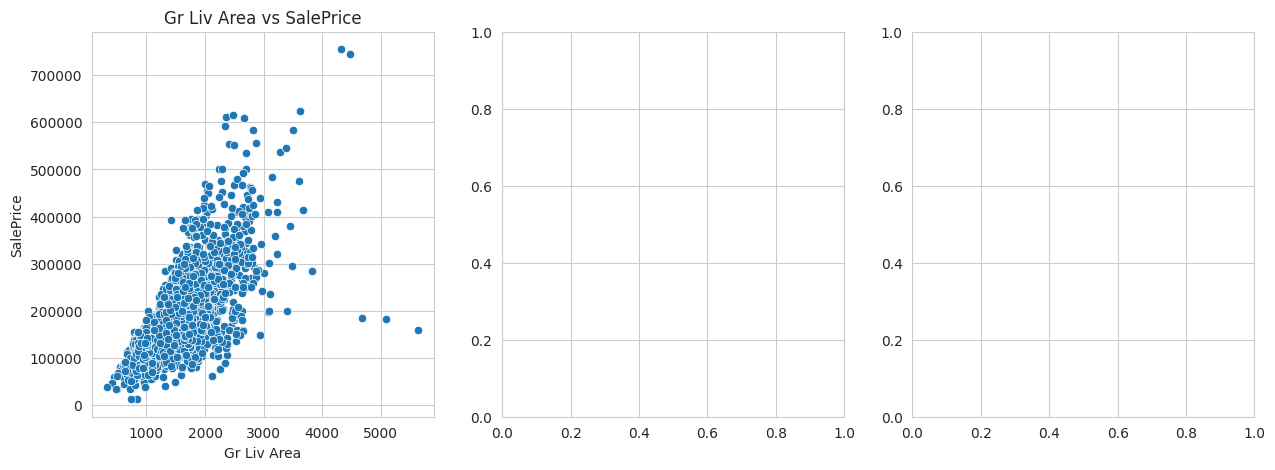

In [13]:
fig, axes = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", data = copied_data, ax = axes[0])
axes[0].set_title("Gr Liv Area vs SalePrice")

<function matplotlib.pyplot.show(close=None, block=None)>

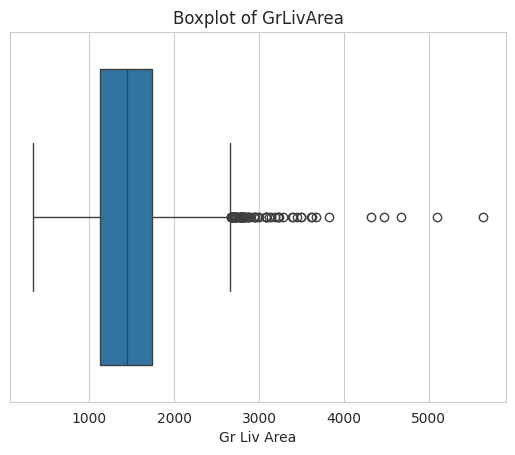

In [14]:
sns.boxplot(x=copied_data['Gr Liv Area'])
plt.title('Boxplot of GrLivArea')
plt.show

In [15]:
missing_percent = copied_data.isnull().sum() / len(copied_data) * 100
cols_to_drop = missing_percent[missing_percent > 50].index
print(f"Dropping columns: {cols_to_drop.tolist()}")

copied_data.drop(columns=cols_to_drop, inplace=True)

Dropping columns: ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']


In [16]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [17]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(copied_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [18]:
train_df.shape, val_df.shape, test_df.shape

((1875, 77), (469, 77), (586, 77))

In [19]:
input_cols = copied_data.drop(columns="SalePrice",axis=1)
target_cols = "SalePrice"

In [20]:
train_input = train_df[input_cols.columns]
train_target = train_df[target_cols]
val_input = val_df[input_cols.columns]
val_target = val_df[target_cols]
test_input = test_df[input_cols.columns]
test_target = test_df[target_cols]

In [21]:
from sklearn.impute import SimpleImputer
num_cols = train_input.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_input.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(train_input[num_cols])
train_input[num_cols] = num_imputer.fit_transform(train_input[num_cols])
test_input[num_cols] = num_imputer.transform(test_input[num_cols])

/tmp/ipython-input-4113951445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[num_cols] = num_imputer.fit_transform(train_input[num_cols])
/tmp/ipython-input-4113951445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_input[num_cols] = num_imputer.transform(test_input[num_cols])


In [22]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit_transform(train_input[cat_cols])


array([['RM', 'Pave', 'Reg', ..., 'Y', 'WD ', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD ', 'Alloca'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD ', 'Family'],
       ...,
       ['RM', 'Pave', 'Reg', ..., 'N', 'WD ', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD ', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD ', 'AdjLand']], dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
encoded = ohe.fit_transform(train_input[cat_cols])

In [24]:
train_input[cat_cols] = cat_imputer.fit_transform(train_input[cat_cols])
val_input[cat_cols] = cat_imputer.transform(val_input[cat_cols])
test_input[cat_cols] = cat_imputer.transform(test_input[cat_cols])

# One-hot encode categorical columns
encoded_train_features = ohe.fit_transform(train_input[cat_cols])
encoded_val_features = ohe.transform(val_input[cat_cols])
encoded_test_features = ohe.transform(test_input[cat_cols])

# Get feature names for the encoded columns
encoded_feature_names = ohe.get_feature_names_out(cat_cols)

# Create DataFrames from the encoded features
train_encoded_df = pd.DataFrame(encoded_train_features.toarray(), columns=encoded_feature_names, index=train_input.index)
val_encoded_df = pd.DataFrame(encoded_val_features.toarray(), columns=encoded_feature_names, index=val_input.index)
test_encoded_df = pd.DataFrame(encoded_test_features.toarray(), columns=encoded_feature_names, index=test_input.index)

# Drop original categorical columns and concatenate with encoded ones
train_input = pd.concat([train_input.drop(columns=cat_cols), train_encoded_df], axis=1)
val_input = pd.concat([val_input.drop(columns=cat_cols), val_encoded_df], axis=1)
test_input = pd.concat([test_input.drop(columns=cat_cols), test_encoded_df], axis=1)

/tmp/ipython-input-245025935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[cat_cols] = cat_imputer.fit_transform(train_input[cat_cols])
/tmp/ipython-input-245025935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[cat_cols] = cat_imputer.transform(val_input[cat_cols])
/tmp/ipython-input-245025935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [25]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [26]:
copied_data["Total SF"] = copied_data["Total Bsmt SF"] + copied_data["1st Flr SF"] + copied_data["2nd Flr SF"]
copied_data["House Age"] = copied_data["Yr Sold"] - copied_data["Year Built"]
copied_data["Years Since Renovation"] = copied_data["Yr Sold"] - copied_data["Year Remod/Add"]

In [27]:
copied_data["SalePrice_log"] = np.log(copied_data["SalePrice"])
print(f"Skewness after: {copied_data['SalePrice_log'].skew():.2f}")

Skewness after: -0.01


In [29]:
from sklearn.preprocessing import StandardScaler
features_to_scale = copied_data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
scaler = StandardScaler()
copied_data_scaled = copied_data.copy()
copied_data_scaled[features_to_scale] = scaler.fit_transform(copied_data[features_to_scale])

In [30]:
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)
test_input_scaled = scaler.transform(test_input)

In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_mean = DummyRegressor(strategy = "mean")
dummy_mean.fit(train_input_scaled, train_target)
y_pred_dummy = dummy_mean.predict(val_input_scaled)
rmse_dummy = np.sqrt(mean_squared_error(val_target, y_pred_dummy))
print(f"Baeline RMSE (mean): {rmse_dummy:.2f}")

Baeline RMSE (mean): 73817.15


In [28]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/house-price-prediction/models/xgboost_model.pkl')

NameError: name 'model' is not defined